# ICE - Análisis de datos de videojuegos (2016)
# Proyecto de ciencia de datos: Predecir el éxito de videojuegos para planificar campañas en 2017

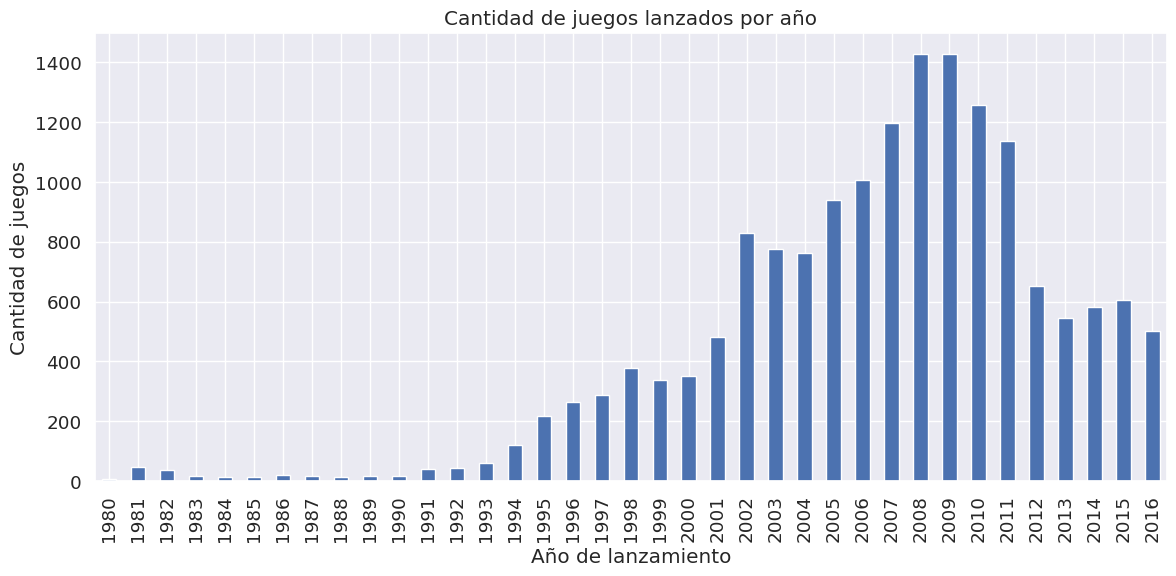

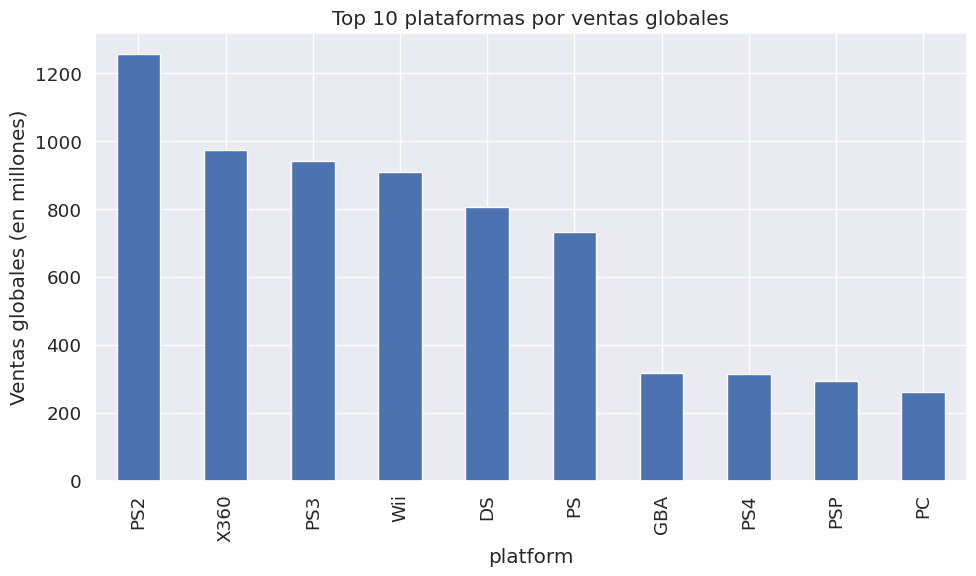

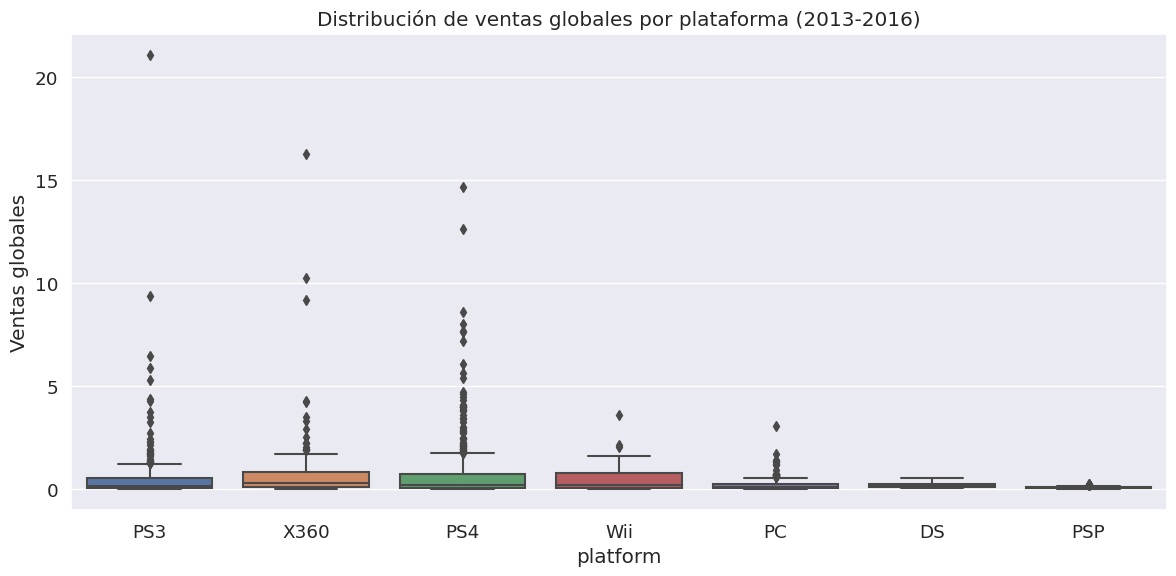

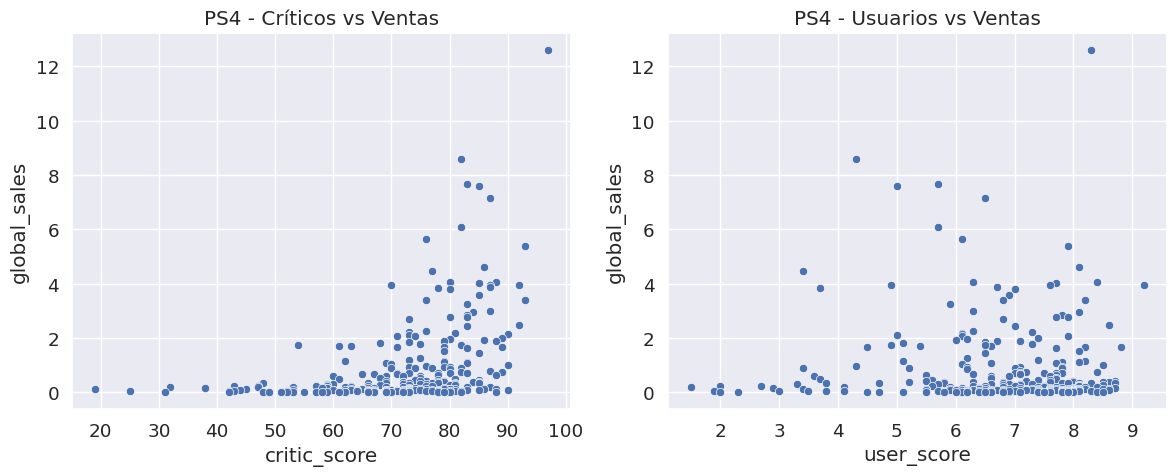

Correlación critic_score - ventas: 0.40656790206178095
Correlación user_score - ventas: -0.031957110204556424


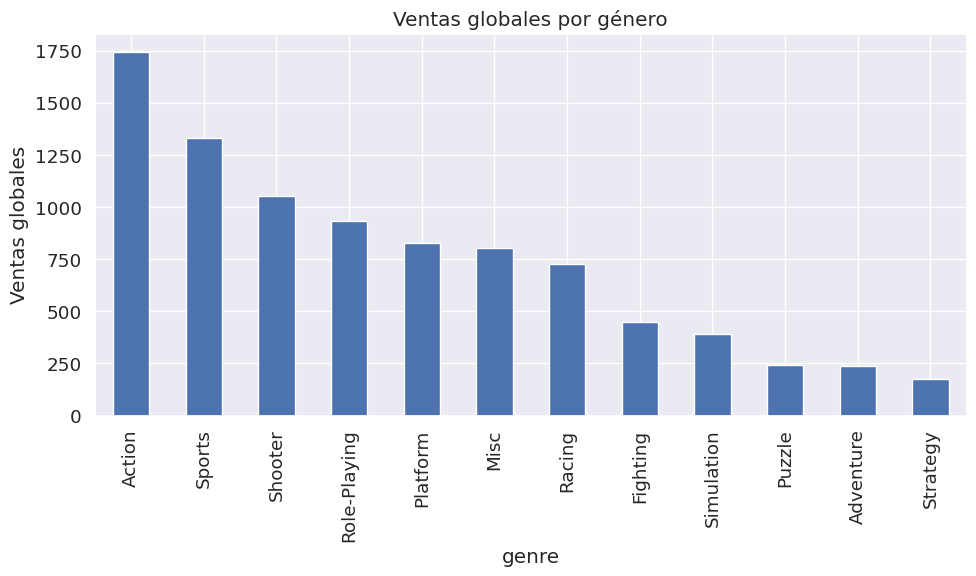

Top plataformas NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top plataformas EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top plataformas JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Top géneros NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top géneros EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top géneros JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Influencia del rating en NA:
rating
AO      1.260000
K-A     0.853333
M       0.478874
E       0.324058
T       0.256586
E10+    0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Configuraciones generales para los gráficos
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Paso 1: Abrimos y exploramos el dataset
file_path = "/datasets/games.csv"
df = pd.read_csv(file_path)

# Paso 2.1: Renombramos las columnas a minúsculas para facilitar el manejo
df.columns = df.columns.str.lower()

# Paso 2.2: Convertimos tipos de datos donde es necesario
# 'user_score' está en formato texto y contiene 'tbd'. Lo pasamos a numérico reemplazando 'tbd' por NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# 'year_of_release' lo convertimos a entero usando 'Int64' para permitir valores nulos
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Paso 2.3: Tratamiento de valores ausentes
# Revisamos la cantidad de valores nulos por columna
missing = df.isnull().sum()

# Eliminamos filas con valores esenciales ausentes (name, platform, genre)
df = df.dropna(subset=['name', 'platform', 'genre'])

# Justificación:
# Los valores en 'year_of_release', 'critic_score', 'user_score' y 'rating' pueden estar ausentes porque:
# - Algunos juegos aún no se han lanzado (en el momento del registro)
# - Algunas fuentes no contienen reseñas de usuarios o críticos
# - La clasificación ESRB puede no estar disponible para ciertos mercados

# Paso 2.4: Calculamos las ventas globales
df['global_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Paso 3.1: Cuántos juegos fueron lanzados cada año
year_counts = df['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(12,6))
year_counts.plot(kind='bar')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.tight_layout()
plt.show()

# Conclusión parcial: vemos una caída en 2016, lo cual puede indicar datos incompletos ese año.

# Paso 3.2: Ventas por plataforma
top_platforms = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_platforms.plot(kind='bar')
plt.title('Top 10 plataformas por ventas globales')
plt.ylabel('Ventas globales (en millones)')
plt.tight_layout()
plt.show()

# Paso 3.3: Filtremos datos recientes (2013-2016) para modelar 2017
df_recent = df[df['year_of_release'].between(2013, 2016)]

# Paso 3.4: Boxplot de ventas por plataforma
plt.figure(figsize=(12,6))
sns.boxplot(data=df_recent[df_recent['platform'].isin(top_platforms.index)], x='platform', y='global_sales')
plt.title('Distribución de ventas globales por plataforma (2013-2016)')
plt.ylabel('Ventas globales')
plt.tight_layout()
plt.show()

# Paso 3.5: Reseñas vs ventas - Ejemplo con PS4
ps4 = df_recent[df_recent['platform'] == 'PS4']
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4, x='critic_score', y='global_sales')
plt.title('PS4 - Críticos vs Ventas')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4, x='user_score', y='global_sales')
plt.title('PS4 - Usuarios vs Ventas')
plt.tight_layout()
plt.show()

# Correlaciones
print("Correlación critic_score - ventas:", ps4['critic_score'].corr(ps4['global_sales']))
print("Correlación user_score - ventas:", ps4['user_score'].corr(ps4['global_sales']))

# Paso 3.6: Distribución por género
genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
genre_sales.plot(kind='bar')
plt.title('Ventas globales por género')
plt.ylabel('Ventas globales')
plt.tight_layout()
plt.show()

# Paso 4: Perfiles regionales
# Funciones para top 5 por región
def top5_region(col):
    return df.groupby('platform')[col].sum().sort_values(ascending=False).head(5)

print("Top plataformas NA:")
print(top5_region('na_sales'))
print("\nTop plataformas EU:")
print(top5_region('eu_sales'))
print("\nTop plataformas JP:")
print(top5_region('jp_sales'))

# Top 5 géneros por región
def top5_genres(col):
    return df.groupby('genre')[col].sum().sort_values(ascending=False).head(5)

print("\nTop géneros NA:")
print(top5_genres('na_sales'))
print("\nTop géneros EU:")
print(top5_genres('eu_sales'))
print("\nTop géneros JP:")
print(top5_genres('jp_sales'))

# ESRB por región
def rating_impact(region):
    return df.groupby('rating')[region].mean().sort_values(ascending=False)

print("\nInfluencia del rating en NA:")
print(rating_impact('na_sales'))

# Paso 5: Pruebas de Hipótesis
# H0: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales
xone = df[(df['platform'] == 'XOne') & (df['user_score'].notnull())]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'].notnull())]['user_score']

alpha = 0.05
stat, pval = stats.ttest_ind(xone, pc)
print("\nHipótesis 1 - p valor:", pval)
if pval < alpha:
    print("Rechazamos H0: Las calificaciones promedio son diferentes")
else:
    print("No se puede rechazar H0: Las calificaciones promedio podrían ser iguales")

# H0: Las calificaciones promedio para Action y Sports son iguales
action = df[(df['genre'] == 'Action') & (df['user_score'].notnull())]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'].notnull())]['user_score']

stat, pval = stats.ttest_ind(action, sports)
print("\nHipótesis 2 - p valor:", pval)
if pval < alpha:
    print("Rechazamos H0: Las calificaciones promedio por género son diferentes")
else:
    print("No se puede rechazar H0: Las calificaciones promedio por género podrían ser iguales")

# Conclusiones Generales

- La cantidad de juegos lanzados tuvo un pico entre 2007 y 2011, con una caída visible en 2016 (probablemente por datos incompletos).
- Las plataformas con mayores ventas globales son PS2, X360, PS3, Wii y DS. Para el periodo reciente (2013-2016), PS4 domina claramente.
- Las ventas presentan alta variabilidad por plataforma. PS4 y XOne muestran ventas consistentes.
- Existe una correlación positiva moderada entre las calificaciones de críticos y las ventas (especialmente en PS4). La de usuarios es más débil.
- El género más rentable globalmente es Action, seguido de Sports y Shooter. Sin embargo, los gustos varían por región: en Japón, Role-Playing domina.
- Las preferencias regionales también afectan a las plataformas líderes: por ejemplo, Nintendo DS y 3DS siguen fuertes en Japón.
- Las pruebas de hipótesis indican que no hay diferencias significativas en las calificaciones promedio entre usuarios de Xbox One y PC, pero sí entre los géneros Action y Sports.

**Recomendaciones:**
- Para 2017, enfocar campañas en PS4 y juegos de acción con buenas críticas.
- Adaptar estrategias a cada región, especialmente para Japón donde los patrones son distintos.